In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('/workspace/srp-boxes')        #Q1: for some reason sys does not have C.ROOT

In [3]:
import srp.config as C
import fiona
import rasterio
from srp.data.outputpresentation import OutputRepresentations 

In [4]:
rgb_image_path = C.COLOR_PATH
volume_raster_path = C.VOLUMETRIC_PATH
annotations_path = C.ANNOTATION_PATH
sample_path = C.SAMPLE_PATH     # so we do have pre-computed numpy storing [pos_xy, neg_xy, pos_angle] in coordinates

In [5]:
densities = rasterio.open(volume_raster_path)
colors = rasterio.open(rgb_image_path)
annotations = fiona.open(annotations_path)
samples = np.load(sample_path)

bounds = tuple((max(densities.bounds.left, colors.bounds.left),
                max(densities.bounds.bottom, colors.bounds.bottom),
                min(densities.bounds.right, colors.bounds.right),
                min(densities.bounds.top, colors.bounds.top)))

In [6]:
pos_xy = samples['pos_xy']
neg_xy = samples['neg_xy']
pos_angles = samples['pos_angles']    # these angles look wrong at this moment calculating using new standard

In [83]:
with fiona.open(annotations_path) as vectorFile:
    hotspots = np.array([f['geometry']['coordinates'] for f in vectorFile if f['geometry'] is not None])
    pos_samples = np.array([OutputRepresentations.get_rot_length_width_from_points(b) for b in hotspots])

(233053.3387757935, 233054.37672491392, 251471.0772154553, 251472.18285890223)

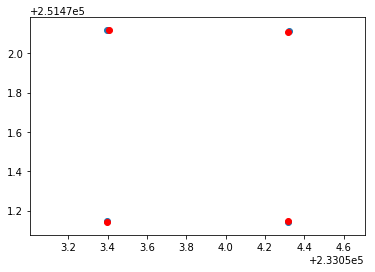

In [95]:
# suggest precomputing these results
# this tests the correctness of get_rot_length_width_from_points

idx = np.random.randint(len(hotspots))
rot = OutputRepresentations.get_rot_length_width_from_points(hotspots[idx])
scatter(*OutputRepresentations.from_rot_length_width((rot[0], rot[1]), rot[2], rot[3], rot[4]).points().T)
scatter(*hotspots[idx].T, color='r')
plt.axis('equal')

In [54]:
from sklearn.model_selection import KFold

The "simple" thing to me is the following:
- we generate files that are all the same size (e.g. 96 by 96)       [_we can totally do this using old code_]
- we keep a record of how each file was generated from the raw input
- we keep a record that tells us what the net should predict when given that small file

In [65]:
kf = KFold(n_splits=C.FOLDS, shuffle=True, random_state=C.FOLD_RANDOM_SEED)

In [66]:
for train_index, test_index in kf.split(hotspots):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    pos_train, pos_test = hotspots[train_index], hotspots[test_index]
    

('TRAIN:', 156, 'TEST:', 40)
('TRAIN:', 157, 'TEST:', 39)
('TRAIN:', 157, 'TEST:', 39)
('TRAIN:', 157, 'TEST:', 39)
('TRAIN:', 157, 'TEST:', 39)


In [49]:
allpos = np.zeros((len(hotspots), 8))
# ['label', 'lon', 'lat', 'box-x', 'box-y', 'box-angle', 'box-length', 'box-width']

allpos[:,0] = 1

In [ ]:
class TrainVal(object):
    def __init__(self)
    super(ChildB, self).__init__()

In [67]:
pos_train

array([[[ 232355.84505441,  251185.50312952],
        [ 232356.66967967,  251185.48949935],
        [ 232356.62197408,  251184.60353833],
        [ 232355.81779408,  251184.60353833]],

       [[ 232331.96271203,  251154.7999919 ],
        [ 232332.24284489,  251154.06403731],
        [ 232331.51282476,  251153.74798054],
        [ 232331.22111616,  251154.4954134 ]],

       [[ 232280.98888696,  251333.33638543],
        [ 232281.87993987,  251333.33811805],
        [ 232281.82341957,  251332.42626475],
        [ 232280.95739772,  251332.39971508]],

       ..., 
       [[ 233210.69909224,  251975.44281022],
        [ 233210.02366842,  251975.95532615],
        [ 233210.5040616 ,  251976.77156633],
        [ 233211.2598203 ,  251976.28861581]],

       [[ 233116.20096199,  252214.71833293],
        [ 233115.43780976,  252214.32585853],
        [ 233115.00901485,  252215.24849613],
        [ 233115.78477553,  252215.64457366]],

       [[ 232756.07900896,  251396.05840087],
        [ 2